In [1]:
# Ignores warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("us_retail_sales.csv")

In [4]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


In [5]:
df = df.fillna(0)

**Plot the data with proper labeling and make some observations on the graph.**

In [6]:
# Reshape the dataframe to have a single 'Month' column and a 'Value' column
df = df.melt(id_vars='YEAR', var_name='Month', value_name='Value')

# Combine the 'YEAR' and 'Month' columns to create a 'Date' column
df['Date'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['Month'], format='%Y-%b')

# Sort the dataframe by the 'Date' column
df = df.sort_values('Date')

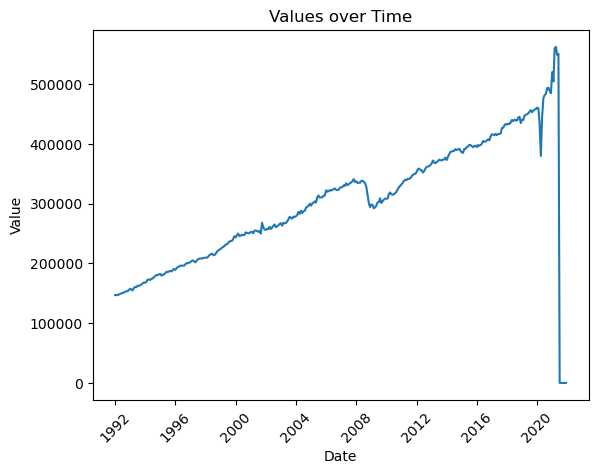

In [7]:
# Plot the values over time
plt.plot(df['Date'], df['Value'])

# Set the x-axis label
plt.xlabel('Date')

# Set the y-axis label
plt.ylabel('Value')

# Set the title of the plot
plt.title('Values over Time')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

The values over time see a steady increase with two dips in 2008 and 2020. The data drops to 0 at the end because any null values were filled with 0. After the dip in 2008, a sharp increase occurs. 

**Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.**

In [8]:
# Set the initial date to split 
start_date = pd.to_datetime('2020-07-01')

In [9]:
# Split the data into two sets
test = df[(df['Date'] >= start_date)]
train = df[(df['Date'] < start_date)]

In [10]:
from time import strptime

In [11]:
# Create the month in number format
test['month_number'] = [strptime(str(x), '%b').tm_mon for x in test['Month']]
train['month_number'] = [strptime(str(x), '%b').tm_mon for x in train['Month']]

In [12]:
# drop columns not needed 
test = test.drop(columns=['Date', 'Month'])
train = train.drop(columns=['Date', 'Month'])

**Use the training set to build a predictive model for the monthly retail sales.**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Separate the target from the features
feature = train.drop('Value', axis=1)
target = train['Value']

#Split the data into training and test
feature_train, feature_test, target_train, target_test = train_test_split(feature, target)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
# Creates linear regression
linear_regression = LinearRegression()

In [17]:
# Fits the model using test data
lr_model = linear_regression.fit(feature_train, target_train)

**Use the model to predict the monthly retail sales on the last year of data.**

In [18]:
target_predicted = linear_regression.predict(feature_test)
target_predicted

array([403257.99499721, 173322.76589053, 269281.59897819, 331419.30618268,
       326436.50562564, 177254.58343472, 252238.7262846 , 186955.56504477,
       240965.01765687, 214485.78285725, 372582.32314939, 355539.4504558 ,
       378873.23122007, 429737.22979684, 152348.07565276, 306248.1788967 ,
       169126.32884234, 366813.15908352, 362881.34153934, 404044.35850605,
       200588.364199  , 374941.4136759 , 409548.9030679 , 323291.0515903 ,
       272427.05301354, 369958.61311886, 334564.76021802, 316735.52401559,
       315162.79699792, 198229.27367249, 178040.94694355, 172536.4023817 ,
       353966.72343813, 362094.9780305 , 156279.89319694, 273999.78003121,
       193511.09261947, 224973.12797613, 291829.01623364, 425019.04874382,
       170699.05586001, 279768.94409708, 157066.25670578, 228904.94552032,
       270854.32599587, 285273.48865893, 211862.07282672, 231264.03604682,
       242537.74467454, 257221.52684163, 190101.01908011, 329846.579165  ,
       221563.05443677, 3

Report t**he RMSE of the model predictions on the test set.**

In [19]:
# Calculates R2
r_sqaured = lr_model.score(feature_test, target_test)
print("R2 Value is:", r_sqaured)

R2 Value is: 0.9752390325112489
